# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
folder = "../setup_dati/"

In [3]:
df = pd.read_csv(folder+"df_quartiles.csv", sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '../setup_dati/df_quartiles.csv'

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,worker_id,paid,task_id,batch_name,unit_id,try_last,try_current,action,time_submit,time_submit_parsed,...,doc_time_elapsed,doc_time_start,doc_time_end,global_outcome,global_form_validity,gold_checks,time_spent_check,time_check_amount,quartile,mean
0,55b645b1fdf99b1c02906872,True,FakeNewsMultidimensional,V4-Prolific-1,unit_145,1,1,Next,"Tue, 23 Aug 2022 12:02:59 GMT",2022-08-23 12:02:59 00:00,...,15.74,1.661256e+09,1.661256e+09,True,True,True,True,True,wrong_false,1.2
1,55ca03e1fdf99b2735fc1dde,True,FakeNewsMultidimensional,V4-Prolific-1,unit_40,1,1,Finish,"Tue, 23 Aug 2022 14:10:44 GMT",2022-08-23 14:10:44 00:00,...,102.11,1.661263e+09,1.661264e+09,True,True,True,True,True,wrong_false,1.1
2,55ca03e1fdf99b2735fc1dde,True,FakeNewsMultidimensional,V4-Prolific-1,unit_40,1,1,Next,"Tue, 23 Aug 2022 14:03:30 GMT",2022-08-23 14:03:30 00:00,...,231.11,1.661263e+09,1.661263e+09,True,True,True,True,True,correct_true,4.3
3,5658000ca9872d0011e1ba26,True,FakeNewsMultidimensional,V4-Prolific-1,unit_196,1,1,Next,"Wed, 24 Aug 2022 08:56:52 GMT",2022-08-24 08:56:52 00:00,...,158.52,1.661331e+09,1.661331e+09,True,True,True,True,True,correct_false,3.2
4,5658000ca9872d0011e1ba26,True,FakeNewsMultidimensional,V4-Prolific-1,unit_196,1,1,Next,"Wed, 24 Aug 2022 08:51:51 GMT",2022-08-24 08:51:51 00:00,...,149.14,1.661331e+09,1.661331e+09,True,True,True,True,True,wrong_true,3.0


seleziono le colonne da mantenere per l'analisiche faremo di seguito

SI analizzano le seguenti :

    tipo autore (rep o dem)
    data in cui sono pronunciate
    posizione (index) con cui vengono presentate ai worker


In [ ]:
columns_to_mantain = ["unit_id", 
                      "doc_id", 
                      "doc_index", 
                      "doc_speaker_party",
                      "doc_statement_date",
                      "doc_statement_text",
                      "doc_statement_description",
                      "doc_fact_check_ground_truth_label",
                      "worker_id",
                      "mean",
                      "quartile"]

In [ ]:
df = df[columns_to_mantain]

suddivido i df in sotto df

faccio group_by


In [ ]:
for val in [ "wrong_false", "correct_false", "wrong_true", "correct_true"]:
    print("numero per " + val +" =" ,len(df[df['quartile'] == val]["doc_id"].unique()))

numero per wrong_false = 5
numero per correct_false = 5
numero per wrong_true = 5
numero per correct_true = 6


In [ ]:
df[df['doc_fact_check_ground_truth_label'] == 'pants-on-fire'].value_counts("doc_id")

doc_id
common-core-testing-homosexual-possibly-can           10
david-perdue-distorts-facts-georgia-agreement-abse    10
gov-john-kasich-says-his-turnpike-plan-would-lower    10
greene-twists-logic-and-facts-pedophilia-charge-ag    10
jd-vance-says-transgender-rights-drives-looming-co    10
no-these-mass-shootings-werent-plot-protect-hillar    10
ohios-mandel-repeats-false-claim-stolen-2020-elect    10
republican-senate-hopeful-claims-montana-sen-jon-t    10
suozzi-calling-hochul-interim-governor-s-misleadin    10
tax-shift-lou-greenwald-sets-truth-o-meter-ablaze-    10
dtype: int64

Divido

In [ ]:
df_true = pd.read_csv(folder+"df_true.csv", sep=',')
df_false = pd.read_csv(folder+"df_false.csv", sep=',')

In [ ]:
df_wrong_false = df[df["quartile"] == "wrong_false"]
df_correct_false = df[df["quartile"] == "correct_false"]
df_wrong_true = df[df["quartile"] == "wrong_true"]
df_correct_true = df[df["quartile"] == "correct_true"]

# Rapporto tra frequenze relative

freq relativa = frequenza assoluta / numero totale candidati

In [81]:
dimensioni_da_analizzare = ["doc_index", 
                            "doc_speaker_party",
                            "doc_statement_date"]

In [82]:
categorie = [df_wrong_false, df_correct_false, df_wrong_true, df_correct_true]
sovra_categoria = [df_true, df_false]

In [83]:
def calcola_frequenza_relativa(df, dimensione, valore_dimensione):
        
        n_candidati = len(df["doc_id"].unique())

        valori = []
        
        for v in df["doc_id"].unique():
            valori.append(df[df["doc_id"] == v][dimensione].unique()[0])
            
        freq_assoluta = valori.count(valore_dimensione)

        return freq_assoluta/n_candidati


In [84]:
def calcola_frequenza_assoluta(df, dimensione, valore_dimensione):
        
        valori = []
        
        for v in df["doc_id"].unique():
            valori.append(df[df["doc_id"] == v][dimensione].unique()[0])
            
        return valori.count(valore_dimensione)


In [17]:
data = []

# considero una categoria
for df_categoria in categorie:
    # scelgo la sovra categoria
    if df_categoria["quartile"].unique()[0] == "wrong_false" or df_categoria["quartile"].unique()[0] == "correct_false":
        df_sovra = df_false
        sovra = "pants-on-fire"
    else:
        df_sovra = df_true
        sovra = "true"
    # considero una dimensione
    for dimensione in dimensioni_da_analizzare:
        for valore_dimensione in df_sovra[dimensione].unique():
            # calcolo la frequenza relativa
            freq_relativa_cat = calcola_frequenza_relativa(df_categoria, dimensione ,valore_dimensione)
            freq_relativa_sovra = calcola_frequenza_relativa(df_sovra, dimensione ,valore_dimensione)
            # rapporto = freq_relativa_cat/freq_relativa_sovra
            row = [valore_dimensione, dimensione, 
                   df_categoria["quartile"].unique()[0],calcola_frequenza_assoluta(df_categoria, dimensione ,valore_dimensione), freq_relativa_cat,
                   sovra,calcola_frequenza_assoluta(df_sovra, dimensione ,valore_dimensione), freq_relativa_sovra, 
                   ]
            data.append(row)
    

In [85]:
df = pd.DataFrame(data, columns=["valore_dimensione", "dimensione", "quartile", "freq_assoluta_cat","freq_relativa_cat", "sovra", "freq_assoluta_sovra","freq_relativa_sovra"])

In [86]:
col = []
for index, row in df.iterrows():
    if row["freq_relativa_sovra"] != 0:
        col.append(row["freq_relativa_cat"]/row["freq_relativa_sovra"]) 
    else:
        col.append(np.nan)
df['rapporto'] = col

In [87]:
df = df.dropna()

In [89]:
df

,valore_dimensione,dimensione,quartile,freq_assoluta_cat,freq_relativa_cat,sovra,freq_assoluta_sovra,freq_relativa_sovra,rapporto
0,0.0,doc_index,wrong_false,2,0.400000,pants-on-fire,5,0.25,1.600000
1,7.0,doc_index,wrong_false,1,0.200000,pants-on-fire,1,0.05,4.000000
2,6.0,doc_index,wrong_false,1,0.200000,pants-on-fire,2,0.10,2.000000
3,5.0,doc_index,wrong_false,1,0.200000,pants-on-fire,3,0.15,1.333333
4,1.0,doc_index,wrong_false,0,0.000000,pants-on-fire,1,0.05,0.000000
...,...,...,...,...,...,...,...,...,...
103,2022-06-13,doc_statement_date,correct_true,0,0.000000,true,1,0.05,0.000000
104,2022-04-19,doc_statement_date,correct_true,1,0.166667,true,1,0.05,3.333333
105,2022-07-17,doc_statement_date,correct_true,1,0.166667,true,3,0.15,1.111111
106,2022-05-08,doc_statement_date,correct_true,0,0.000000,true,1,0.05,0.000000


In [88]:
df[df['sovra'] == "true"].sort_index()

,valore_dimensione,dimensione,quartile,freq_assoluta_cat,freq_relativa_cat,sovra,freq_assoluta_sovra,freq_relativa_sovra,rapporto
58,5.0,doc_index,wrong_true,0,0.000000,true,2,0.10,0.000000
59,3.0,doc_index,wrong_true,1,0.200000,true,2,0.10,2.000000
60,4.0,doc_index,wrong_true,1,0.200000,true,3,0.15,1.333333
61,0.0,doc_index,wrong_true,0,0.000000,true,3,0.15,0.000000
62,6.0,doc_index,wrong_true,3,0.600000,true,6,0.30,2.000000
63,2.0,doc_index,wrong_true,0,0.000000,true,4,0.20,0.000000
66,REP,doc_speaker_party,wrong_true,5,1.000000,true,8,0.40,2.500000
67,DEM,doc_speaker_party,wrong_true,0,0.000000,true,12,0.60,0.000000
68,2022-07-16,doc_statement_date,wrong_true,1,0.200000,true,2,0.10,2.000000
69,2022-04-29,doc_statement_date,wrong_true,0,0.000000,true,1,0.05,0.000000


ora si calcola:
- p prop => (Dati k > 1 gruppi, l’ipotesi nulla di questo test afferma che le proporzioni p1, ..., pk di questi gruppi sono tutte uguali (p1 = p2 = ... = pk); l’ipotesi alternativa afferma, invece, che esiste almeno una proporzione pi diversa dalle altre.)

- p trend => permette di verificare la presenza di una tendenza lineare tra le proporzioni (l’ipotesi nulla è che non vi sia alcuna tendenza tra di esse; l’alternativa è che vi sia un aumento/decremento lineare della proporzione man mano che si sale/scende nelle categorie. Questo test è da eseguire solo se la variabile categoriale considerata è ordinale.)

per il p prop uso scipy.stats.linregress()

In [22]:
import statsmodels.stats.proportion as ssp

uso frequenza assoluta

In [23]:
def plot_sub_df(df_sovra, dimensione):
    df_for_plot = []
    nome_sovra = df_sovra['doc_fact_check_ground_truth_label'].unique()[0]
    for id in df_sovra["doc_id"].unique():
        mean = df_sovra[df_sovra["doc_id"] == id]["mean"].unique()[0]
        p = df_sovra[df_sovra["doc_id"] == id][dimensione].unique()[0]
        quar = df_sovra[df_sovra["doc_id"] == id]["quartile"].unique()[0]
        row = [id, mean,p,quar,nome_sovra]
        df_for_plot.append(row)

    df_for_plot = pd.DataFrame(df_for_plot, columns=["doc_id", "mean",dimensione,"quartile","GT"])
    
    if nome_sovra == "pants-on-fire":
        order = ["wrong_false", "other", "correct_false"]
    else:
        order = ["wrong_true", "other", "correct_true"]
        
    title = str(dimensione) + " - " + str(nome_sovra)
    
    ax = sns.stripplot(y='mean', x='quartile', data=df_for_plot, hue=dimensione ,jitter=0.1, size=8, order=order, palette="Set2")
    # show the graph
    plt.title(title, loc="left")
    plt.show()

    facciamo un esempio con df_sovra = df_false e dimensione = doc_speaker_party

In [24]:
subDF = df.loc[(df['quartile'] == "wrong_false") & (df['dimensione'] == "doc_speaker_party")]
subDF = subDF[['valore_dimensione', 'freq_assoluta_cat','freq_assoluta_sovra']].T
subDF.columns = subDF.iloc[0]

subDF = subDF.drop('valore_dimensione')

subDF

valore_dimensione,REP,DEM
freq_assoluta_cat,4,1
freq_assoluta_sovra,14,6


In [25]:
subDF = df.loc[(df['quartile'] == "correct_false") & (df['dimensione'] == "doc_speaker_party")]
subDF = subDF[['valore_dimensione', 'freq_assoluta_cat','freq_assoluta_sovra']].T
subDF.columns = subDF.iloc[0]

subDF = subDF.drop('valore_dimensione')

subDF

valore_dimensione,REP,DEM
freq_assoluta_cat,2,3
freq_assoluta_sovra,14,6


In [26]:
subDF = df.loc[(df['quartile'] == "wrong_true") & (df['dimensione'] == "doc_speaker_party")]
subDF

,valore_dimensione,dimensione,quartile,freq_assoluta_cat,freq_relativa_cat,sovra,freq_assoluta_sovra,freq_relativa_sovra,rapporto
66,REP,doc_speaker_party,wrong_true,5,1.0,true,8,0.4,2.5
67,DEM,doc_speaker_party,wrong_true,0,0.0,true,12,0.6,0.0


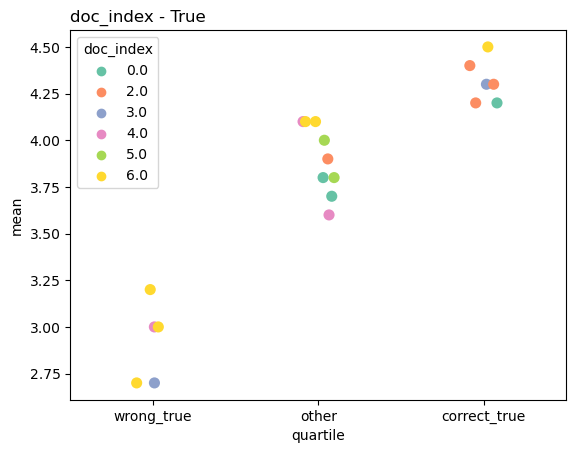

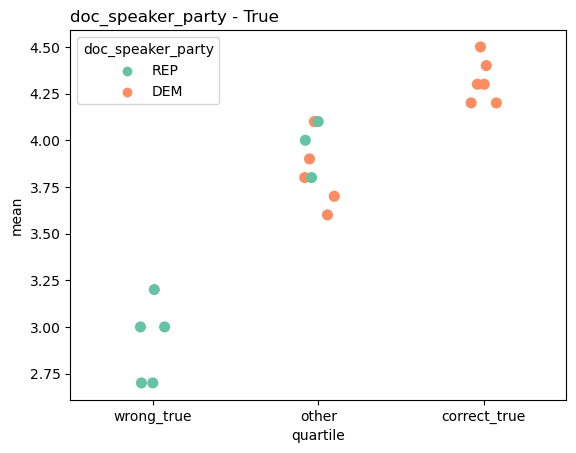

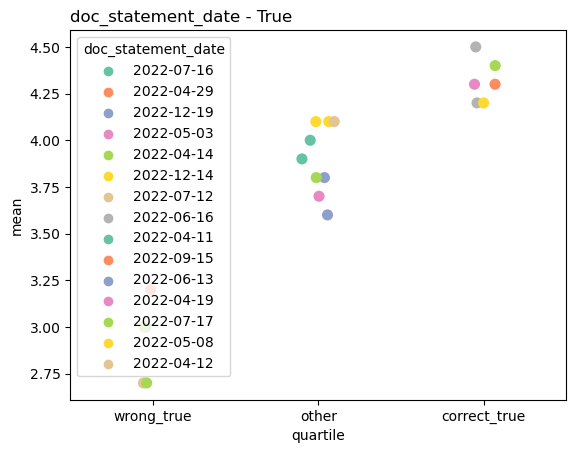

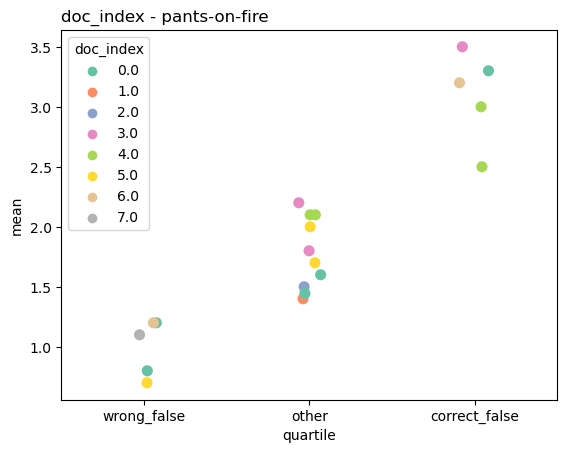

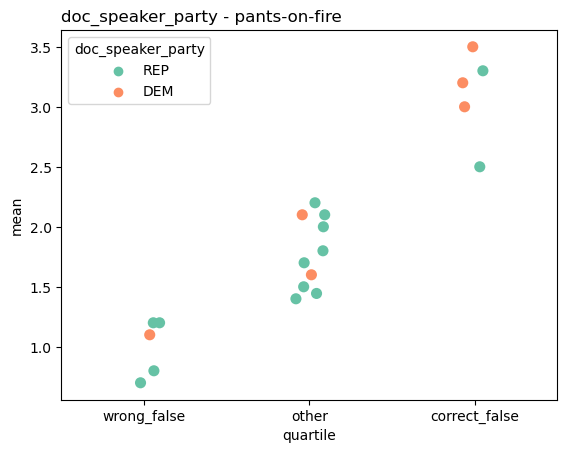

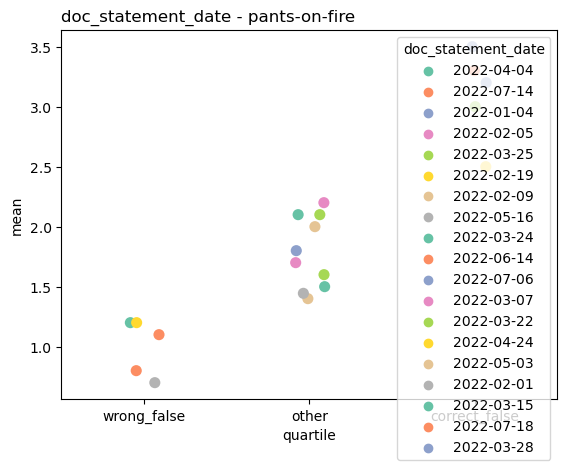

In [27]:
for df_sovra in [df_true, df_false]:
    for dimensione in dimensioni_da_analizzare:
        plot_sub_df(df_sovra, dimensione)


In [28]:
def plot_barplot(df, val_dimensione, quartile):
    sub_df_to_plot = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == val_dimensione)]
    ax = sns.barplot(data=sub_df_to_plot, y="valore_dimensione", x="rapporto", palette="Set2",orient="h")
    for i in ax.containers:
        ax.bar_label(i,)
    title = val_dimensione + " - " + quartile
    plt.title(title, loc="left")
    plt.show()
        
    

In [29]:
''' versione con valore dimensione !!!'''

p_value_df_assoluto_con_valore_dimensione = []

quartili_da_analizzare = ["wrong_false", "wrong_true", "correct_false", "correct_true"]
for quartile in quartili_da_analizzare:
    for dimensione in dimensioni_da_analizzare:
        
        subDF = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == dimensione)]
        
        # check se ci sono almeno 2 valori per la dimensione presa in considerazione => se no mi torna errore
        if len(subDF) > 1:
            
            subDF = subDF[['valore_dimensione', 'freq_assoluta_cat','freq_assoluta_sovra']].T
            subDF.columns = subDF.iloc[0]

            subDF = subDF.drop('valore_dimensione')
                    
            for valore_dimensione in subDF.columns:

                rapporto = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == dimensione) & (df['valore_dimensione'] == valore_dimensione)]["rapporto"].unique()[0]
                
                count = subDF.iloc[0] # particolare
                nobs = subDF.iloc[1] # totale
                (chi2, p, arr) = ssp.proportions_chisquare(count,nobs)
                row = [quartile, dimensione, valore_dimensione, rapporto, p]
                p_value_df_assoluto_con_valore_dimensione.append(row)
                if p < 0.05:
                    res_all = ssp.proportions_chisquare_allpairs(count, nobs, multitest_method='b')
                    risp = subDF.columns
                    for pval, pair in zip(res_all.pvals_raw, res_all.all_pairs):
                        val1, val2=pair
                        val1=risp[val1]
                        val2=risp[val2]
                        print('quartile',quartile, 'dimensione',dimensione,'val1',val1, 'val2',val2, 'pval',pval)

p_value_df_assoluto_con_valore_dimensione = pd.DataFrame(p_value_df_assoluto_con_valore_dimensione, columns=["quartile", "dimensione", "valore_dimensione", "rapporto","p_value"])
p_value_df_assoluto_con_valore_dimensione[p_value_df_assoluto_con_valore_dimensione["p_value"] <= 0.05].sort_values(by=['p_value'], ascending=True)

quartile wrong_true dimensione doc_speaker_party val1 REP val2 DEM pval 0.001565402258002549
quartile wrong_true dimensione doc_speaker_party val1 REP val2 DEM pval 0.001565402258002549
quartile correct_true dimensione doc_speaker_party val1 REP val2 DEM pval 0.01682740948275682
quartile correct_true dimensione doc_speaker_party val1 REP val2 DEM pval 0.01682740948275682


,quartile,dimensione,valore_dimensione,rapporto,p_value
35,wrong_true,doc_speaker_party,REP,2.500000,0.001565
36,wrong_true,doc_speaker_party,DEM,0.000000,0.001565
87,correct_true,doc_speaker_party,REP,0.000000,0.016827
88,correct_true,doc_speaker_party,DEM,1.666667,0.016827


In [30]:
'''versione che analizza solo dimensione'''

p_value_df_assoluto = []

quartili_da_analizzare = ["wrong_false", "wrong_true", "correct_false", "correct_true"]
for quartile in quartili_da_analizzare:
    for dimensione in dimensioni_da_analizzare:
        
        subDF = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == dimensione)]
        
        # check se ci sono almeno 2 valori per la dimensione presa in considerazione => se no mi torna errore
        if len(subDF) > 1:
            
            subDF = subDF[['valore_dimensione', 'freq_assoluta_cat','freq_assoluta_sovra']].T
            subDF.columns = subDF.iloc[0]

            subDF = subDF.drop('valore_dimensione')
                    
            for valore_dimensione in subDF.columns:

                rapporto = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == dimensione) & (df['valore_dimensione'] == valore_dimensione)]["rapporto"].unique()[0]
                
                count = subDF.iloc[0] # particolare
                nobs = subDF.iloc[1] # totale
                
            (chi2, p, arr) = ssp.proportions_chisquare(count,nobs)
            row = [quartile, dimensione, valore_dimensione, rapporto, p]
            
            p_value_df_assoluto.append(row)
            
            if p < 0.05:
                res_all = ssp.proportions_chisquare_allpairs(count, nobs, multitest_method='b')
                risp = subDF.columns
                for pval, pair in zip(res_all.pvals_raw, res_all.all_pairs):
                    val1, val2=pair
                    val1=risp[val1]
                    val2=risp[val2]
                    print('quartile',quartile, 'dimensione',dimensione,'val1',val1, 'val2',val2, 'pval',pval)

p_value_df_assoluto = pd.DataFrame(p_value_df_assoluto, columns=["quartile", "dimensione", "valore_dimensione", "rapporto","p_value"])
interessanti = p_value_df_assoluto[p_value_df_assoluto["p_value"] <= 0.05].sort_values(by=['p_value'], ascending=True)

df_dimensioni_interessanti = []

for index, row in interessanti.iterrows():
    df_dimensioni_interessanti.append([row["quartile"], row["dimensione"]])

df_dimensioni_interessanti = pd.DataFrame(df_dimensioni_interessanti, columns=["quartile", "dimensione"])
df_dimensioni_interessanti


quartile wrong_true dimensione doc_speaker_party val1 REP val2 DEM pval 0.001565402258002549
quartile correct_true dimensione doc_speaker_party val1 REP val2 DEM pval 0.01682740948275682


,quartile,dimensione
0,wrong_true,doc_speaker_party
1,correct_true,doc_speaker_party


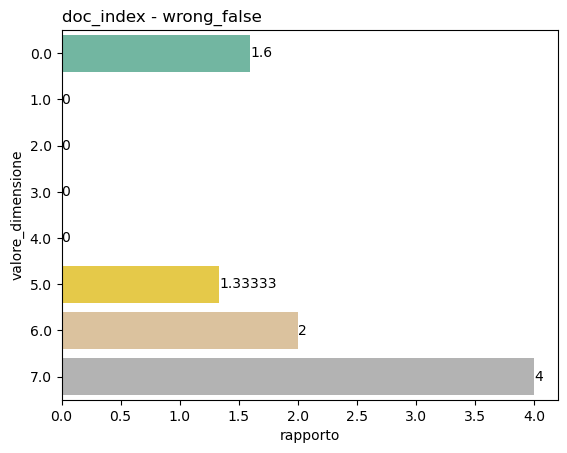

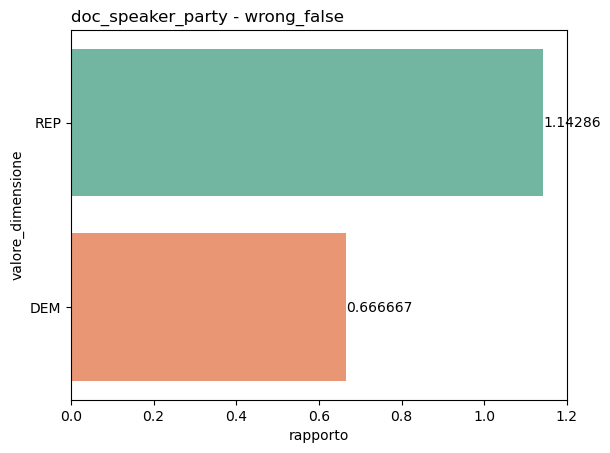

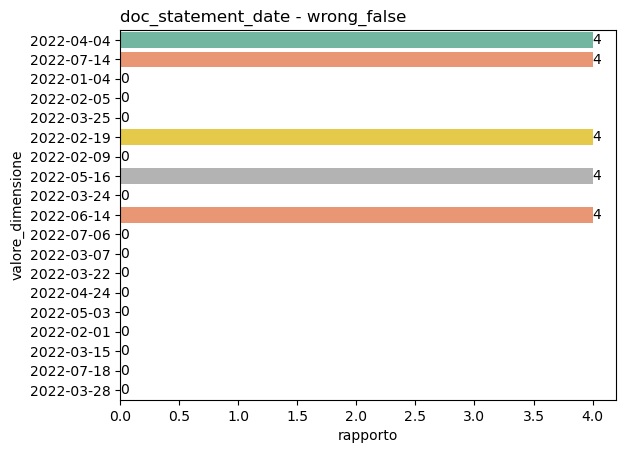

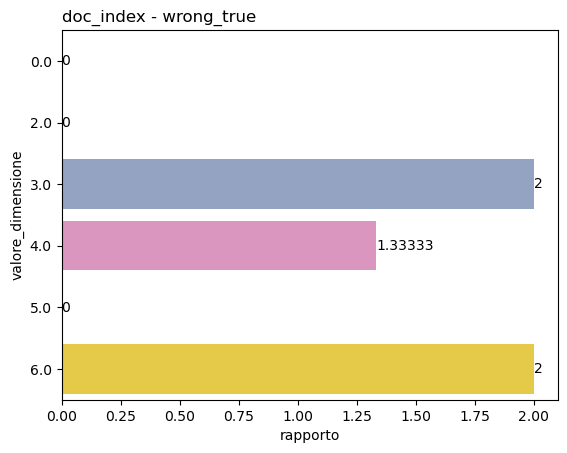

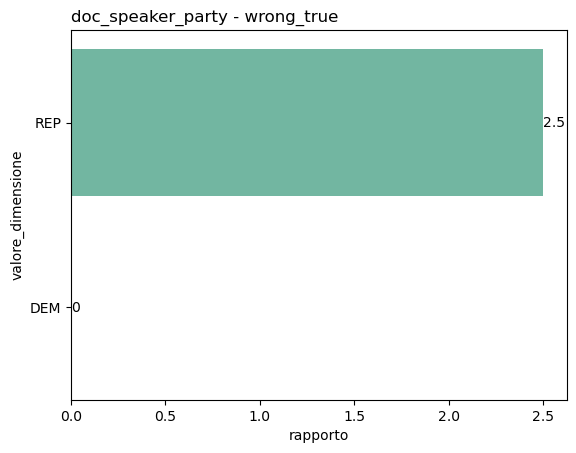

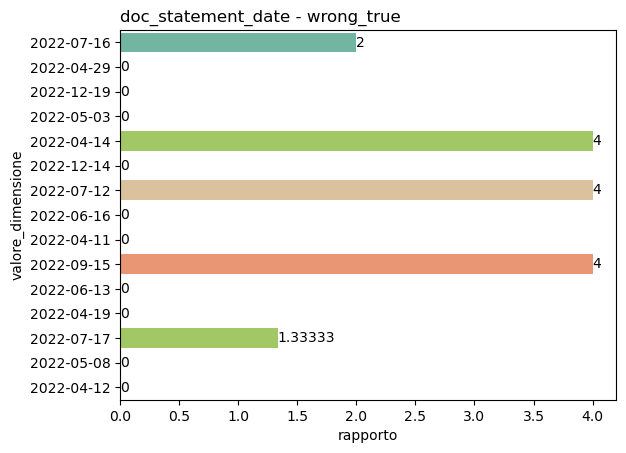

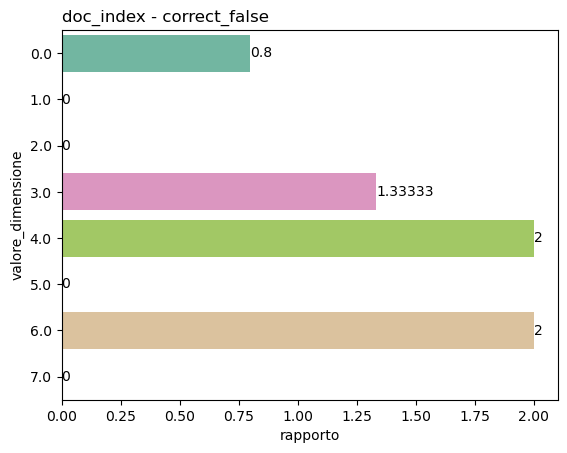

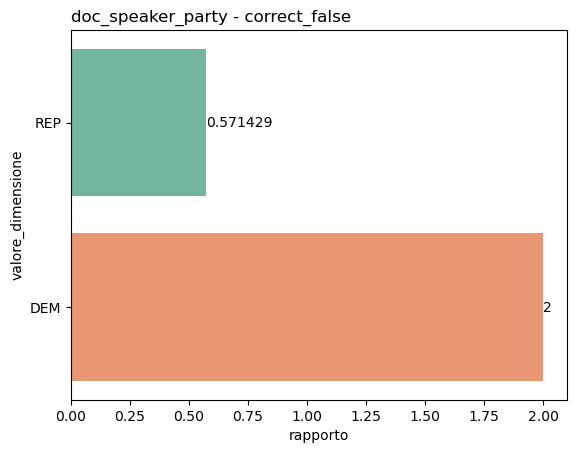

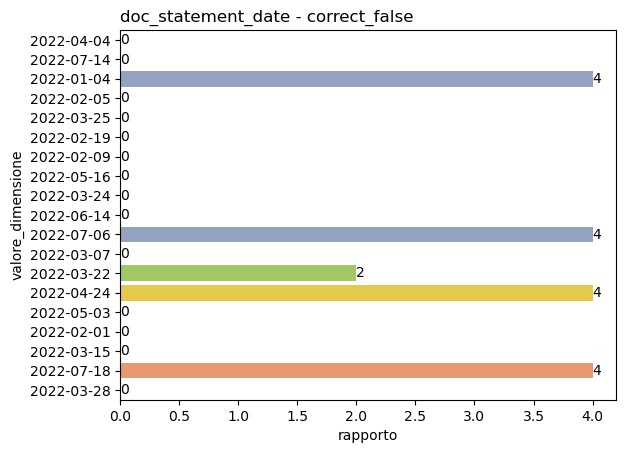

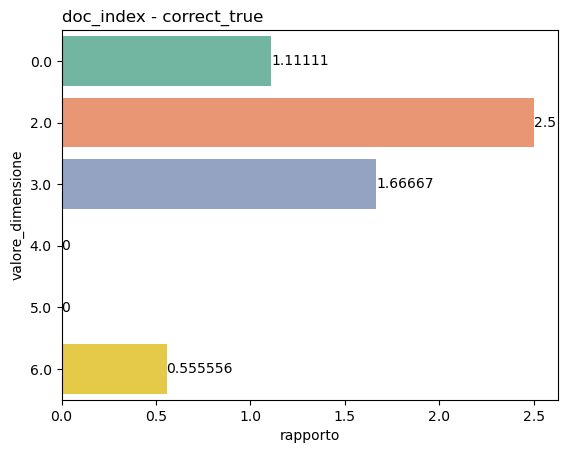

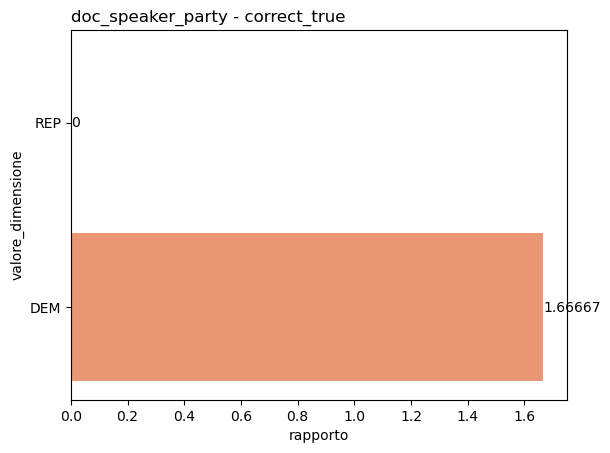

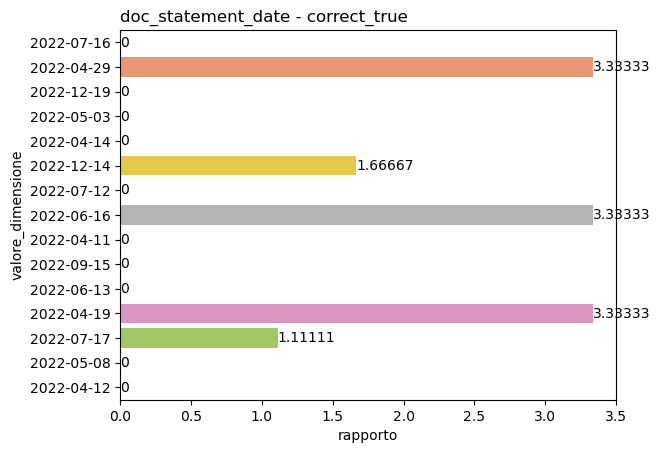

In [31]:
for categoria in ["wrong_false", "wrong_true", "correct_false", "correct_true"]:
    for dimensione in dimensioni_da_analizzare:
        plot_barplot(p_value_df_assoluto_con_valore_dimensione, dimensione, categoria)

per il p prop uso la funzione "prop_trend_test()" => solo se la variabile/dimensione è ordinale

CHIEDI!!

In [32]:
'''

from scipy.stats import trend_test

dimensioni_ordinali = ["doc_statement_date","doc_index"]

p_trend_df_assoluto = []

quartili_da_analizzare = ["wrong_false", "wrong_true", "correct_false", "correct_true"]
for quartile in quartili_da_analizzare:
    for dimensione in dimensioni_ordinali:
        
        subDF = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == dimensione)]
        
        # check se ci sono almeno 2 valori per la dimensione presa in considerazione => se no mi torna errore
        if len(subDF) > 1:
            
            subDF = subDF[['valore_dimensione', 'freq_assoluta_cat','freq_assoluta_sovra']].T
            subDF.columns = subDF.iloc[0]

            subDF = subDF.drop('valore_dimensione')
                 
            for valore_dimensione in subDF.columns:

                rapporto = df.loc[(df['quartile'] == quartile) & (df['dimensione'] == dimensione) & (df['valore_dimensione'] == valore_dimensione)]["rapporto"].unique()[0]
                
                count = subDF.iloc[0] # particolare
                nobs = subDF.iloc[1] # totale
          
            # Esegue il test del chi-quadrato per tendenza
            stat, p_val, dof, expected = trend_test(subDF)

            # Stampa il valore della statistica del test e il valore p
            print("Statistica del test:", stat)
            print("Valore p:", p_val)

        
p_trend_df_assoluto

'''

'\n\nfrom scipy.stats import trend_test\n\ndimensioni_ordinali = ["doc_statement_date","doc_index"]\n\np_trend_df_assoluto = []\n\nquartili_da_analizzare = ["wrong_false", "wrong_true", "correct_false", "correct_true"]\nfor quartile in quartili_da_analizzare:\n    for dimensione in dimensioni_ordinali:\n        \n        subDF = df.loc[(df[\'quartile\'] == quartile) & (df[\'dimensione\'] == dimensione)]\n        \n        # check se ci sono almeno 2 valori per la dimensione presa in considerazione => se no mi torna errore\n        if len(subDF) > 1:\n            \n            subDF = subDF[[\'valore_dimensione\', \'freq_assoluta_cat\',\'freq_assoluta_sovra\']].T\n            subDF.columns = subDF.iloc[0]\n\n            subDF = subDF.drop(\'valore_dimensione\')\n                 \n            for valore_dimensione in subDF.columns:\n\n                rapporto = df.loc[(df[\'quartile\'] == quartile) & (df[\'dimensione\'] == dimensione) & (df[\'valore_dimensione\'] == valore_dimensione)][

## Analisi del linguaggio naturale

### Distribuzione del numero di parole significative

    parole significative = parole che non sono stop word
    dizionario = inglese

In [33]:
testi_wrong_false = df_wrong_false[["doc_statement_text", "doc_id"]].drop_duplicates()
testi_wrong_false


,doc_statement_text,doc_id
0,"Says Sens. Lisa Murkowski, Susan Collins and M...",greene-twists-logic-and-facts-pedophilia-charg...
1,The 2020 election âwas stolen from Donald J....,ohios-mandel-repeats-false-claim-stolen-2020-e...
8,Says Joe Biden risks war with Russia because V...,jd-vance-says-transgender-rights-drives-loomin...
10,A company hired to do Common Core testing in F...,common-core-testing-homosexual-possibly-can
17,Three mass shootings were meant to distract fr...,no-these-mass-shootings-werent-plot-protect-hi...


In [34]:
import nltk
from nltk.corpus import stopwords

# Scarica le stopwords inglesi se non già presenti
nltk.download('stopwords')


for frase in testi_wrong_false["doc_statement_text"]:
    
    # Separa la frase in parole
    parole = frase.split()

    # Rimuovi le stopwords inglesi
    stopwords_eng = stopwords.words('english')
    parole_significative = [parola for parola in parole if parola.lower() not in stopwords_eng]

    # Calcola il numero di parole significative
    numero_parole_significative = len(parole_significative)

    print(f"La frase '{frase}' contiene {numero_parole_significative} parole significative.")


La frase 'Says Sens. Lisa Murkowski, Susan Collins and Mitt Romney âare pro-pedophile.â' contiene 10 parole significative.
La frase 'The 2020 election âwas stolen from Donald J. Trump.â' contiene 7 parole significative.
La frase 'Says Joe Biden risks war with Russia because Vladimir Putin doesnât âbelieve in transgender rights."' contiene 12 parole significative.
La frase 'A company hired to do Common Core testing in Florida will "attract every one of your children to become as homosexual as they possibly can."' contiene 14 parole significative.
La frase 'Three mass shootings were meant to distract from Hillary Clinton controversies.' contiene 8 parole significative.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df_testi_con_numeri = []

for df_quaritile in [df_wrong_false, df_wrong_true, df_correct_false, df_correct_true]:
    q = df_quaritile["quartile"].unique()[0]
    df_testi = df_quaritile[["doc_statement_text", "doc_id"]].drop_duplicates()
    for frase in df_testi["doc_statement_text"]:
        # Separa la frase in parole
        parole = frase.split()
        # Rimuovi le stopwords inglesi
        stopwords_eng = stopwords.words('english')
        parole_significative = [parola for parola in parole if parola.lower() not in stopwords_eng]
        # Calcola il numero di parole significative
        numero_parole_significative = len(parole_significative)
        
        id = df_testi.loc[df_testi["doc_statement_text"] == frase]["doc_id"].unique()[0]
        df_testi_con_numeri.append([q, frase, numero_parole_significative, id, parole_significative, len(parole),numero_parole_significative/len(parole),1-numero_parole_significative/len(parole)])
        
df_testi_con_numeri = pd.DataFrame(df_testi_con_numeri, columns=["quartile", "doc_statement_text", "numero_parole_significative", "doc_id","parole_significative", "lunghezza_iniziale","percentuale_parole_significative","percentuale_parole_non_significative"])

In [36]:
df_testi_con_numeri

,quartile,doc_statement_text,numero_parole_significative,doc_id,parole_significative,lunghezza_iniziale,percentuale_parole_significative,percentuale_parole_non_significative
0,wrong_false,"Says Sens. Lisa Murkowski, Susan Collins and M...",10,greene-twists-logic-and-facts-pedophilia-charg...,"[Says, Sens., Lisa, Murkowski,, Susan, Collins...",11,0.909091,0.090909
1,wrong_false,The 2020 election âwas stolen from Donald J....,7,ohios-mandel-repeats-false-claim-stolen-2020-e...,"[2020, election, âwas, stolen, Donald, J., T...",9,0.777778,0.222222
2,wrong_false,Says Joe Biden risks war with Russia because V...,12,jd-vance-says-transgender-rights-drives-loomin...,"[Says, Joe, Biden, risks, war, Russia, Vladimi...",15,0.800000,0.200000
3,wrong_false,A company hired to do Common Core testing in F...,14,common-core-testing-homosexual-possibly-can,"[company, hired, Common, Core, testing, Florid...",25,0.560000,0.440000
4,wrong_false,Three mass shootings were meant to distract fr...,8,no-these-mass-shootings-werent-plot-protect-hi...,"[Three, mass, shootings, meant, distract, Hill...",11,0.727273,0.272727
5,wrong_true,"""This year, the overwhelming majority of new j...",8,susan-collins-says-year-overwhelming-majority-...,"[""This, year,, overwhelming, majority, new, jo...",11,0.727273,0.272727
6,wrong_true,The state crime lab under Attorney General Jos...,28,state-crime-lab-doing-less-testing-and-general...,"[state, crime, lab, Attorney, General, Josh, K...",37,0.756757,0.243243
7,wrong_true,"""Governor Carcieri has not been campaigning wi...",4,allan-fung-former-ri-gov-donald-carcieri-has-n...,"[""Governor, Carcieri, campaigning, me.""]",8,0.500000,0.500000
8,wrong_true,"""Zephyr Teachout says she is against Super PAC...",11,some-teachouts-donors-also-gave-super-pacs,"[""Zephyr, Teachout, says, Super, PACs, despite...",15,0.733333,0.266667
9,wrong_true,Seven of Americaâs 10 wealthiest counties ar...,8,jim-jordan-says-seven-nations-10-wealthiest-co...,"[Seven, Americaâs, 10, wealthiest, counties,...",12,0.666667,0.333333


    numero_parole_significative 

C:\Users\gabri\AppData\Local\Temp\ipykernel_24720\1886999043.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = ["black"],x="quartile", y="numero_parole_significative", data=df_testi_con_numeri, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_24720\1886999043.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.stripplot(palette = ["black"],x="quartile", y="numero_parole_significative", data=df_testi_con_numeri, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])


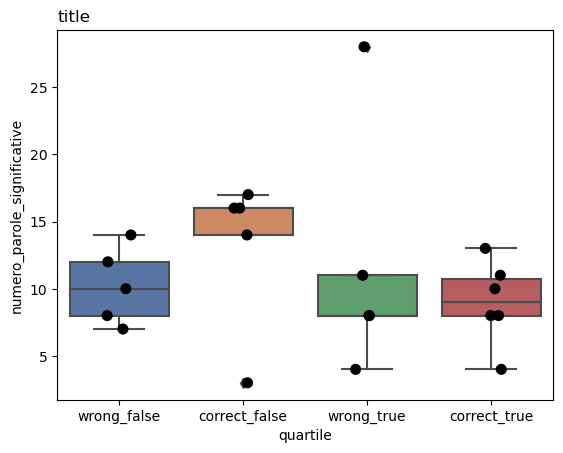

In [37]:
ax = sns.boxplot(palette = "deep",x="quartile", y="numero_parole_significative", data=df_testi_con_numeri,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
   
ax = sns.stripplot(palette = ["black"],x="quartile", y="numero_parole_significative", data=df_testi_con_numeri, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

# add title
plt.title("title", loc="left")
# show the graph
plt.show()

In [38]:
wf = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "wrong_false"]["numero_parole_significative"].unique().tolist()
cf = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "correct_false"]["numero_parole_significative"].unique().tolist()
wt = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "wrong_true"]["numero_parole_significative"].unique().tolist()
ct = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "correct_true"]["numero_parole_significative"].unique().tolist()

In [39]:
group1 = cf 
group2 = wf + wt + ct

In [40]:
from scipy.stats import mannwhitneyu

# Eseguire il test di Mann-Whitney U
stat, p = mannwhitneyu(group1, group2)
print(stat,p)

38.5 0.28624300889808596


    percentuale_parole_significative

C:\Users\gabri\AppData\Local\Temp\ipykernel_24720\2621893481.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = ["black"],x="quartile", y="percentuale_parole_significative", data=df_testi_con_numeri, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_24720\2621893481.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.stripplot(palette = ["black"],x="quartile", y="percentuale_parole_significative", data=df_testi_con_numeri, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])


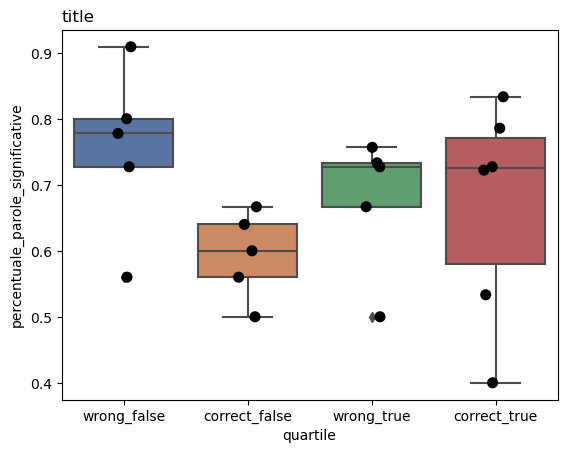

In [41]:
ax = sns.boxplot(palette = "deep",x="quartile", y="percentuale_parole_significative", data=df_testi_con_numeri,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
   
ax = sns.stripplot(palette = ["black"],x="quartile", y="percentuale_parole_significative", data=df_testi_con_numeri, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

# add title
plt.title("title", loc="left")
# show the graph
plt.show()

In [42]:
wf = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "wrong_false"]["percentuale_parole_significative"].unique().tolist()
cf = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "correct_false"]["percentuale_parole_significative"].unique().tolist()
wt = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "wrong_true"]["percentuale_parole_significative"].unique().tolist()
ct = df_testi_con_numeri[df_testi_con_numeri["quartile"] == "correct_true"]["percentuale_parole_significative"].unique().tolist()

In [43]:
group1 = cf 
group2 = wf + wt + ct

In [44]:
from scipy.stats import mannwhitneyu

# Eseguire il test di Mann-Whitney U
stat, p = mannwhitneyu(group1, group2)
print(stat,p)

17.5 0.0686474601424762


### Distribuzione della leggibilit`a (FRE)

In [45]:
import textstat

In [46]:
df_fre = []

for df_quaritile in [df_wrong_false, df_wrong_true, df_correct_false, df_correct_true]:
    q = df_quaritile["quartile"].unique()[0]
    df_testi = df_quaritile[["doc_statement_text", "doc_id"]].drop_duplicates()
    for frase in df_testi["doc_statement_text"]:
        fre = textstat.flesch_reading_ease(frase)
        
        id = df_testi.loc[df_testi["doc_statement_text"] == frase]["doc_id"].unique()[0]
        df_fre.append([q, frase, id, fre])
        
df_fre = pd.DataFrame(df_fre, columns=["quartile", "doc_statement_text", "doc_id","fre"])
df_fre

,quartile,doc_statement_text,doc_id,fre
0,wrong_false,"Says Sens. Lisa Murkowski, Susan Collins and M...",greene-twists-logic-and-facts-pedophilia-charg...,77.23
1,wrong_false,The 2020 election âwas stolen from Donald J....,ohios-mandel-repeats-false-claim-stolen-2020-e...,96.18
2,wrong_false,Says Joe Biden risks war with Russia because V...,jd-vance-says-transgender-rights-drives-loomin...,64.71
3,wrong_false,A company hired to do Common Core testing in F...,common-core-testing-homosexual-possibly-can,46.10
4,wrong_false,Three mass shootings were meant to distract fr...,no-these-mass-shootings-werent-plot-protect-hi...,68.77
5,wrong_true,"""This year, the overwhelming majority of new j...",susan-collins-says-year-overwhelming-majority-...,68.77
6,wrong_true,The state crime lab under Attorney General Jos...,state-crime-lab-doing-less-testing-and-general...,42.38
7,wrong_true,"""Governor Carcieri has not been campaigning wi...",allan-fung-former-ri-gov-donald-carcieri-has-n...,71.82
8,wrong_true,"""Zephyr Teachout says she is against Super PAC...",some-teachouts-donors-also-gave-super-pacs,73.17
9,wrong_true,Seven of Americaâs 10 wealthiest counties ar...,jim-jordan-says-seven-nations-10-wealthiest-co...,50.84


C:\Users\gabri\AppData\Local\Temp\ipykernel_24720\1245478175.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = ["black"],x="quartile", y="fre", data=df_fre, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])
C:\Users\gabri\AppData\Local\Temp\ipykernel_24720\1245478175.py:3: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.stripplot(palette = ["black"],x="quartile", y="fre", data=df_fre, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])


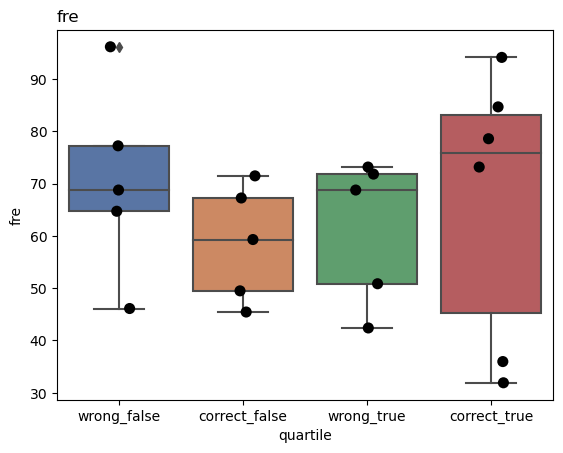

In [47]:
ax = sns.boxplot(palette = "deep",x="quartile", y="fre", data=df_fre,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
   
ax = sns.stripplot(palette = ["black"],x="quartile", y="fre", data=df_fre, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

# add title
plt.title("fre", loc="left")
# show the graph
plt.show()

In [48]:
wf = df_fre[df_fre["quartile"] == "wrong_false"]["fre"].unique().tolist()
cf = df_fre[df_fre["quartile"] == "correct_false"]["fre"].unique().tolist()
wt = df_fre[df_fre["quartile"] == "wrong_true"]["fre"].unique().tolist()
ct = df_fre[df_fre["quartile"] == "correct_true"]["fre"].unique().tolist()

In [49]:
group1 = cf
group2 = wt + ct + wf

In [50]:
from scipy.stats import mannwhitneyu

# Eseguire il test di Mann-Whitney U
stat, p = mannwhitneyu(group1, group2)
print(stat,p)

26.0 0.26465747666762696


Il test di Mann-Whitney U è un test non parametrico utilizzato per confrontare due campioni indipendenti e stabilire se esiste una differenza significativa tra di essi. In particolare, il test viene utilizzato per verificare se le mediane dei due campioni sono significativamente diverse.

### Rapporti tra frequenze relative dei valori del sentimento e soggettività

    sentiment:
    > 0 => positivo
    = 0 => neutro
    < 0 => negativo

    soggettività:
    0 => oggettivo
    1 => soggettivo

In [ ]:
from textblob import TextBlob

In [53]:
df_sentiment_subjectivity = []

for df_quaritile in [df_wrong_false, df_wrong_true, df_correct_false, df_correct_true]:
    q = df_quaritile["quartile"].unique()[0]
    df_testi = df_quaritile[["doc_statement_text", "doc_id"]].drop_duplicates()
    for frase in df_testi["doc_statement_text"]:
        # Analizza il sentiment della frase in inglese
        sentiment = TextBlob(frase).sentiment.polarity

        # Analizza la soggettività della frase in inglese
        subjectivity = TextBlob(frase).sentiment.subjectivity
        
        id = df_testi.loc[df_testi["doc_statement_text"] == frase]["doc_id"].unique()[0]
        df_sentiment_subjectivity.append([q, frase, id, sentiment, subjectivity])
        
df_sentiment_subjectivity = pd.DataFrame(df_sentiment_subjectivity, columns=["quartile", "doc_statement_text", "doc_id","sentiment", "subjectivity"])
df_sentiment_subjectivity

,quartile,doc_statement_text,doc_id,sentiment,subjectivity
0,wrong_false,"Says Sens. Lisa Murkowski, Susan Collins and M...",greene-twists-logic-and-facts-pedophilia-charg...,0.000000,0.000000
1,wrong_false,The 2020 election âwas stolen from Donald J....,ohios-mandel-repeats-false-claim-stolen-2020-e...,0.000000,0.000000
2,wrong_false,Says Joe Biden risks war with Russia because V...,jd-vance-says-transgender-rights-drives-loomin...,0.000000,0.000000
3,wrong_false,A company hired to do Common Core testing in F...,common-core-testing-homosexual-possibly-can,-0.150000,0.750000
4,wrong_false,Three mass shootings were meant to distract fr...,no-these-mass-shootings-werent-plot-protect-hi...,0.000000,0.000000
5,wrong_true,"""This year, the overwhelming majority of new j...",susan-collins-says-year-overwhelming-majority-...,0.318182,0.727273
6,wrong_true,The state crime lab under Attorney General Jos...,state-crime-lab-doing-less-testing-and-general...,0.076667,0.413333
7,wrong_true,"""Governor Carcieri has not been campaigning wi...",allan-fung-former-ri-gov-donald-carcieri-has-n...,0.000000,0.000000
8,wrong_true,"""Zephyr Teachout says she is against Super PAC...",some-teachouts-donors-also-gave-super-pacs,0.333333,0.666667
9,wrong_true,Seven of Americaâs 10 wealthiest counties ar...,jim-jordan-says-seven-nations-10-wealthiest-co...,0.000000,0.000000


aggingo label

In [58]:
for index, row in df_sentiment_subjectivity.iterrows():
    if row["sentiment"] > 0:
        df_sentiment_subjectivity.loc[index, "valore_sentiment"] = "positive"
    elif row["sentiment"] == 0:
        df_sentiment_subjectivity.loc[index, "valore_sentiment"] = "neutral"
    else:
        df_sentiment_subjectivity.loc[index, "valore_sentiment"] = "negative"
    if row["subjectivity"] >= 0.80:
        df_sentiment_subjectivity.loc[index, "valore_subjectivity"] = "alta"
    elif row["subjectivity"] >= 0.60:
        df_sentiment_subjectivity.loc[index, "valore_subjectivity"] = "media-alta"
    elif row["subjectivity"] >= 0.40:
        df_sentiment_subjectivity.loc[index, "valore_subjectivity"] = "media"
    elif row["subjectivity"] >= 0.20:
        df_sentiment_subjectivity.loc[index, "valore_subjectivity"] = "media-bassa"
    else:
        df_sentiment_subjectivity.loc[index, "valore_subjectivity"] = "bassa"

In [59]:
df_sentiment_subjectivity

,quartile,doc_statement_text,doc_id,sentiment,subjectivity,valore_sentiment,valore_subjectivity
0,wrong_false,"Says Sens. Lisa Murkowski, Susan Collins and M...",greene-twists-logic-and-facts-pedophilia-charg...,0.000000,0.000000,neutral,bassa
1,wrong_false,The 2020 election âwas stolen from Donald J....,ohios-mandel-repeats-false-claim-stolen-2020-e...,0.000000,0.000000,neutral,bassa
2,wrong_false,Says Joe Biden risks war with Russia because V...,jd-vance-says-transgender-rights-drives-loomin...,0.000000,0.000000,neutral,bassa
3,wrong_false,A company hired to do Common Core testing in F...,common-core-testing-homosexual-possibly-can,-0.150000,0.750000,negative,media-alta
4,wrong_false,Three mass shootings were meant to distract fr...,no-these-mass-shootings-werent-plot-protect-hi...,0.000000,0.000000,neutral,bassa
5,wrong_true,"""This year, the overwhelming majority of new j...",susan-collins-says-year-overwhelming-majority-...,0.318182,0.727273,positive,media-alta
6,wrong_true,The state crime lab under Attorney General Jos...,state-crime-lab-doing-less-testing-and-general...,0.076667,0.413333,positive,media
7,wrong_true,"""Governor Carcieri has not been campaigning wi...",allan-fung-former-ri-gov-donald-carcieri-has-n...,0.000000,0.000000,neutral,bassa
8,wrong_true,"""Zephyr Teachout says she is against Super PAC...",some-teachouts-donors-also-gave-super-pacs,0.333333,0.666667,positive,media-alta
9,wrong_true,Seven of Americaâs 10 wealthiest counties ar...,jim-jordan-says-seven-nations-10-wealthiest-co...,0.000000,0.000000,neutral,bassa


## regressione lineare

In [102]:
df_per_regressione = df_true[['doc_id',"mean","doc_index"]]

In [104]:
df_per_regressione["doc_id"].unique()

array(['john-boehner-says-stimulus-bill-was-rushed-passage',
       'yes-tax-break-ron-johnson-pushed-2017-has-benefite',
       'susan-collins-says-year-overwhelming-majority-new-',
       'fact-checking-bernie-sanders-claim-us-spends-three',
       'more-50-years-ago-new-york-republican-support-abor',
       'state-crime-lab-doing-less-testing-and-generally-t',
       'warrens-argument-millions-cant-afford-their-rx-dru',
       'allan-fung-former-ri-gov-donald-carcieri-has-not-b',
       'virginia-blacks-eight-times-more-likely-whites-be-',
       'yes-its-true-cannabis-reform-supported-wisconsin-i',
       'some-teachouts-donors-also-gave-super-pacs',
       'yes-wisconsins-abortion-law-older-20-us-states',
       'new-york-state-so-many-bills',
       'crist-says-reagan-was-democrat-converting-gop',
       'big-four-meat-packers-are-seeing-record-profits-sp',
       'yes-democrats-do-need-more-majority-codify-roe-vs-',
       'chris-christie-claims-states-gained-143000-new-pri',
  

In [108]:
df_per_regressione = df_false[['doc_id',"mean","doc_index"]]
df_per_regressione

,doc_id,mean,doc_index
0,greene-twists-logic-and-facts-pedophilia-charg...,1.2,0.0
1,ohios-mandel-repeats-false-claim-stolen-2020-e...,1.1,7.0
2,suozzi-calling-hochul-interim-governor-s-misle...,3.2,6.0
3,graphic-labeled-top-ten-most-unhealthy-us-citi...,1.7,5.0
4,suozzi-calling-hochul-interim-governor-s-misle...,3.2,1.0
...,...,...,...
194,courts-have-repeatedly-upheld-grants-gableman-...,2.2,7.0
195,do-republicans-want-throw-doctors-who-break-ab...,2.0,3.0
196,ohio-gop-candidate-falsely-says-more-votes-reg...,1.8,5.0
197,courts-have-repeatedly-upheld-grants-gableman-...,2.2,0.0


<Axes: xlabel='mean', ylabel='doc_index'>

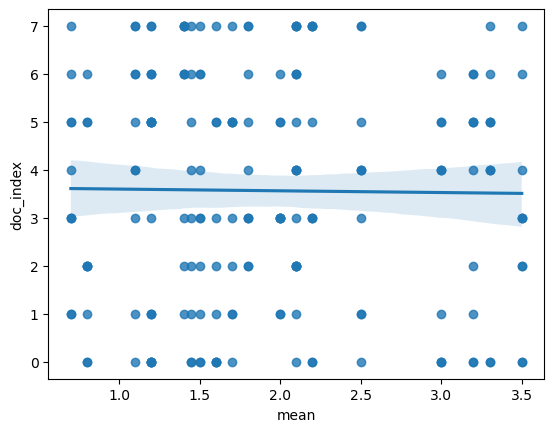

In [109]:
sns.regplot(x="mean", y="doc_index", data=df_per_regressione)